# 2008 Olympics Dataset 
## Data Cleaning & Preparation

#### This project explores the **2008 Olympic  dataset**, analyzing athletes, their characteristics, and the overall  **distribution of medals across sports and genders**. The goal is to apply Tidy Data principles to reshape and clean the data for meaningful insights and visualizations that could help the user better understand the dataset. 

### **Step 1: Importing Libraries & Loading the Dataset**
* To begin,  import necessary Python libraries and load the dataset, which has been previously moved to the same folder as the notebok. 

    * **pandas**  is imported for data manipulation and cleaning.
    * **matplotlib.pyplot** & **seaborn**  is imported for  visualizations.

### **Step 2: Learning about the Data**
* The dataset contains 1875 rows and 71 columns. The data consists of:

   *  **Medalist Name**  : The name of the athlete.
   * **male_sport**, **female_sport** : Columns listing the sports that are categorized by gender. The values within the columns note the type of medals (Gold, Silver, Bronze).


In [362]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data and display it to understand its structure
olympics_data = pd.read_csv('olympics_08_medalists.csv')
olympics_data.shape
print(olympics_data)


          medalist_name male_archery female_archery male_athletics  \
0       Aaron Armstrong          NaN            NaN           gold   
1         Aaron Peirsol          NaN            NaN            NaN   
2      Abdullo Tangriev          NaN            NaN            NaN   
3     Abeer Abdelrahman          NaN            NaN            NaN   
4               Abhinav          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
1870        Éver Banega          NaN            NaN            NaN   
1871  Ólafur Stefánsson          NaN            NaN            NaN   
1872      Óscar Brayson          NaN            NaN            NaN   
1873   Łukasz Pawłowski          NaN            NaN            NaN   
1874        Živko Gocić          NaN            NaN            NaN   

     female_athletics male_badminton female_badminton male_baseball  \
0                 NaN            NaN              NaN           NaN   
1                

### The data does not seem to be so concise and organized, which is why the next step is to convert this into a tidy dataset, where:  
* Each variable is in its own column.
* Each observation forms its own row.
* Each type of observational unit forms its own table.


### **Step 3: Renaming Columns for Clarity**
* Rename `'medalist_name'` to **'Medalist Name'** for consistency in column naming.

### **Step 4: Reshaping the Data (Melting)**
1. **Melt** the columns (`male_sport`, `female_sport`) into two new columns: 'Category' and 'Medal'
    *   **Medal**: Values are the type of medal
    *   **Category**: Values are the sport and gender 
2. **Drop missing values**: Dropping rows where no medal was won. 


In [363]:

# Rename column name for consistency
olympics_data = olympics_data.rename(columns={'medalist_name': 'Medalist Name'})


# Reshaping data from wide to long format. 

olympics_data_melted = pd.melt(olympics_data, 
                               id_vars=['Medalist Name'], 
                               var_name='Category', #Creating a new column 
                               value_name='Medal') #Assigning values as "medal"

# Drop rows where no medal was won

olympics_data_melted = olympics_data_melted.dropna() 

olympics_data_melted.head()

,Medalist Name,Category,Medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold




### *  After **melting** the dataset, the `'Category'` column still contains **multiple variables** (both **Gender** and **Sport** combined in one string,, `'male_archery'`).  To fully achieve **Tidy Data**, **split** this column into two **separate** variables:  
  * **Gender**: Notes the gender of the athlete
  * **Sport**: Notes the actual sport the athlete competed in 

### **Step 1: Splitting the 'Category' Column** :
 `str.split('_', expand=True)` is used to **separate Gender and Sport**.  
 This ensures that **each variable gets its own column**, improving data organization.  

###  **Step 2: Correct Formatting** 
Convert `Gender`, `Medal`, and `Sport` to **Title Case** using `str.title()` to capitalize the first letter of each. 

### **Step 3: Drop the 'Category' Column**  
Now that there are  separate columns for Gender and Sport, th  original `'Category'` column can be removed. 

###  **Step 4: Reordering Columns**  
Having a more logical order: Medalist Name → Gender → Sport → Medal, making it easier to analyze. 


In [364]:

# Identify existing columns
print(olympics_data_melted.columns)

# Split the "Category" column into two: "Gender" and "Sport"
olympics_data_melted[['Gender', 'Sport']] = olympics_data_melted['Category'].str.split( '_', expand=True)

# Capitaloize names to make data look cleaner and organized
olympics_data_melted['Gender'] = olympics_data_melted['Gender'].str.title()
olympics_data_melted['Medal'] = olympics_data_melted['Medal'].str.title()
olympics_data_melted['Sport'] = olympics_data_melted['Sport'].str.title()


# Drop the Original 'Category' column now that we have 2 new columns
olympics_data_melted = olympics_data_melted.drop(columns=['Category'])

#Reorder columns in a way that makes sense, having gender and sport before medal. 
olympics_data_melted = olympics_data_melted[['Medalist Name', 'Gender', 'Sport', 'Medal']]


# Display cleaned dataset
olympics_data_melted.head()


Index(['Medalist Name', 'Category', 'Medal'], dtype='object')


,Medalist Name,Gender,Sport,Medal
177,Bair Badënov,Male,Archery,Bronze
676,Ilario Di Buò,Male,Archery,Silver
682,Im Dong-hyun,Male,Archery,Gold
760,Jiang Lin,Male,Archery,Bronze
920,Lee Chang-hwan,Male,Archery,Gold


# Diving Deeper: Finding Patterns in Medal Distribution  

### After cleaning the dataset, **patterns and trends** in the data are explored using **pivot tables** and visualizations. By doing this, users can know which sport awarded the most medals and whether there were differences in male vs. female participation. 

## **Why Use Pivot Tables?**  
### The **Pandas Cheat Sheet** teaches that `pivot_table()` is used to **reshape data**, allowing us to spread rows into columns and therefore improve readability of complex datasets. The cheat sheet has served as a resource to find the proper codes.


###  **Step 1: Create the Pivot Table**
Create **pivot table** to count the total number of **medals awarded per sport**, broken down by **Gender**:  
- **Index:** `'Sport'` (sports listed as rows).  
- **Columns:** `'Gender'` (separating medals in two columns, by men vs. women).  
- **Values:** `'Medal'` (counting how many medals were won in each).  
- **Aggregation:** Use the `'count'` function to count up total number of medals awarded. 

### **Step 2: Add a Total Medals Column**  
To determine which sports had the **highest number of medals**, there is a sum across **both genders** to create a  new **Total Medals** column.

### **Step 3: Sort Sports by Total Medals**  
Sort  in **descending order** to allow use to identity the sports that awarded the most medals quicker.


In [365]:
# Pivot Table 1 - Showing count of medals by sport, separated by gender

medal_distribution = olympics_data_melted.pivot_table(index='Sport', 
                                                             columns='Gender', 
                                                             values='Medal', 
                                                             aggfunc='count', 
                                                             fill_value=0)

# Add a total medals column to see which sport had the highest amount of medals 
medal_distribution['Total Medals'] = medal_distribution.sum(axis=1)

# Sort sports by total medals won in descending order
medal_distribution = medal_distribution.sort_values(by='Total Medals', ascending=False)

medal_distribution.head()

Gender,Female,Male,Total Medals
Sport,,,
Athletics,81,85,166
Rowing,58,83,141
Swimming,63,62,125
Association Football,54,55,109
Field Hockey,48,50,98


# Top 10 Sports Awarding the Most Olympic Medals  

This **bar chart** visualizes the **Top 10 sports that awarded the most medals** in the 2008 Olympics, identifying which sports dominate the Olympics in terms of medal distribution


### **Step 1: Filter the Top 10 Sports**  
* Using `.head(10)`, we **filter the 10 sports with the highest total medal count**

### ** Step 2: Create the Bar Chart**  
*  The `seaborn` library (`sns.barplot`) helps us plot this data, which we imported at the beginning of the notebook. 
*  We use a color palette (`"Blues"`) for visual liking.

### **Step 3: Understand the Chart**  
- **Some sports award more medals than others** due to factors like:  
  - Having **multiple event categories** (e.g., **Athletics, Swimming**).  
  - Being **team-based sports**, where medals are awarded to **each team member**.  
  
Higher medal counts often indicate high participation, helping  identify **which sports dominate the Olympics** in terms of **medal distribution**.  


/var/folders/s1/80f726k51wg6ls9g2m9zgfjw0000gn/T/ipykernel_18985/3619167955.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_medal_sports['Total Medals'], y=top_10_medal_sports.index, palette="Blues", hue = None)


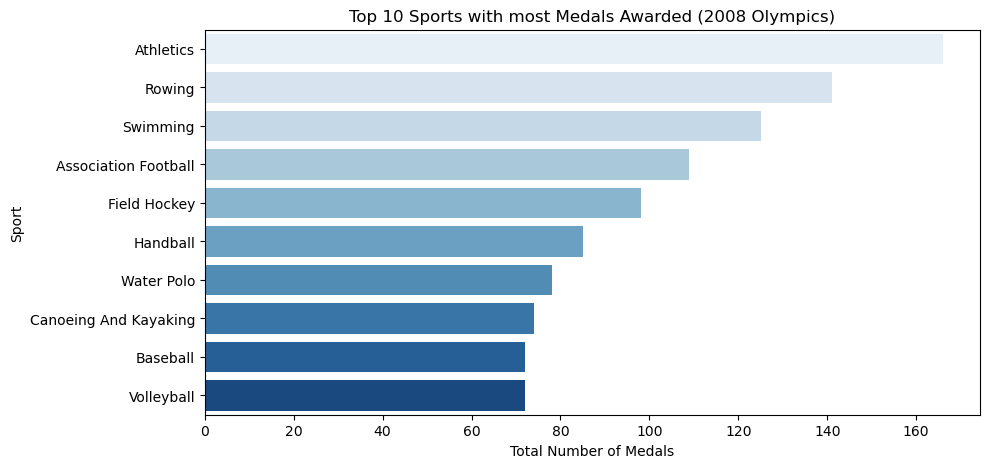

In [376]:
# Visualization 1 - Visualizing the Top 10 Sports that Award the Most Olympic Medals.

# Get top 10 sports by total medal count
top_10_medal_sports = medal_distribution.head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_medal_sports['Total Medals'], y=top_10_medal_sports.index, palette="Blues", hue = None)

plt.title("Top 10 Sports with most Medals Awarded (2008 Olympics)")
plt.xlabel("Total Number of Medals")
plt.ylabel("Sport")
plt.show()



# Top 10 Sports Awarding the Least Olympic Medals

### This visualization looks at the opposite side of the spectrum, highlighting the sports that awarded the least medals in the 2008 Olympics. Fewer medals may indicate that these sports have fewer event categories, fewer competitors, or are highly selective and competitive, making them more exclusive and unique.  

**Seaborn library is also used to plot this bar graph, using a different palet for visual liking** 


/var/folders/s1/80f726k51wg6ls9g2m9zgfjw0000gn/T/ipykernel_18985/3931868860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_10_medal_sports['Total Medals'], y=low_10_medal_sports.index, palette="Reds", hue = None)


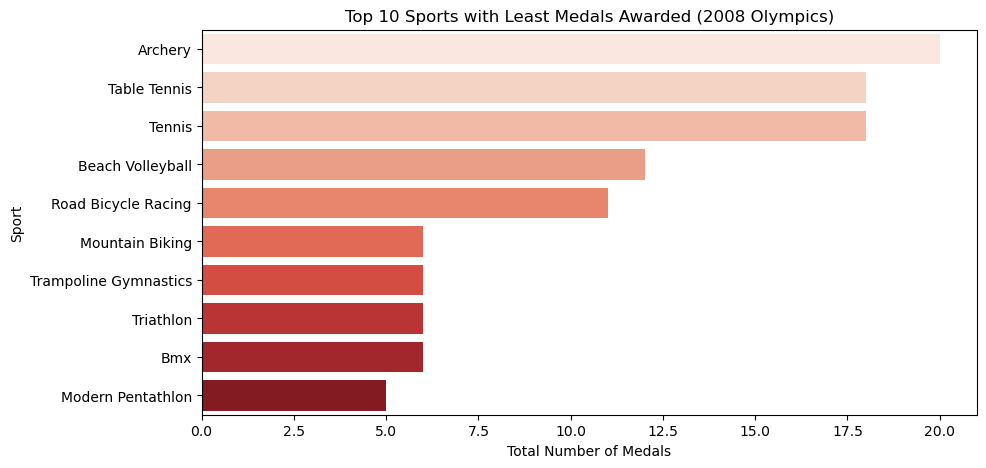

In [367]:
# Visualization 2  - 10 Sports with least medals given

# Get top 10 sports by least total medal count
low_10_medal_sports = medal_distribution.tail(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=low_10_medal_sports['Total Medals'], y=low_10_medal_sports.index, palette="Reds", hue = None)

plt.title("Top 10 Sports with Least Medals Awarded (2008 Olympics)")
plt.xlabel("Total Number of Medals")
plt.ylabel("Sport")
plt.show()

# Exploring Gender Representation in the 2008 Olympics  

After analyzing medal distribution by sport, the next step is diving deeper into gender representation in this Olympic Event. The first visualization is a pie chart to visualize the total share of medals won by men and women.

- **Blue** represents **male athletes**.  
- **Pink** represents **female athletes**.


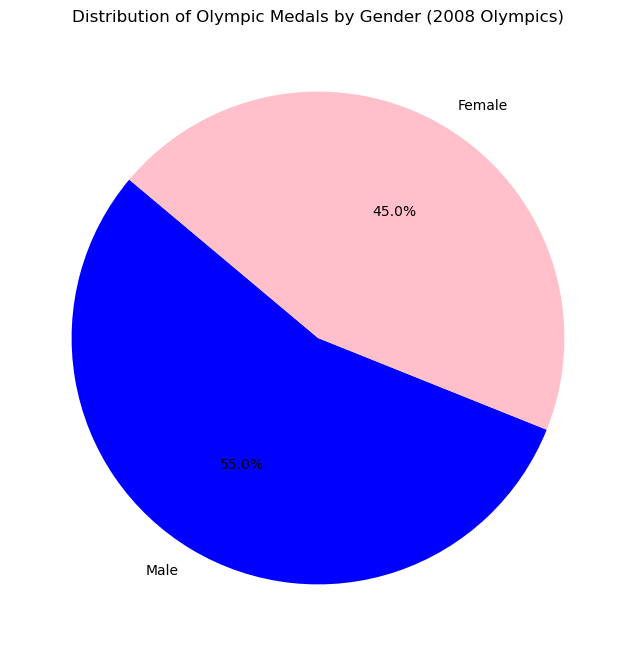

In [368]:
gender_medal_distribution = olympics_data_melted['Gender'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(gender_medal_distribution, 
        labels=gender_medal_distribution.index,  #sets labels
        autopct='%1.1f%%', #formats percentage label inside chart and with one decimal
        colors=['blue', 'pink'],  # Blue for men, pink for women
        startangle=140) #Rotates pie chart 

# Add title
plt.title("Distribution of Olympic Medals by Gender (2008 Olympics)")

plt.show()

 To quantify the level of female participation in each sport, the percentage of medals won by women was calculated:
- A **higher percentage** indicates **greater female representation** in that sport based.
- A **lower percentage** means the sport was **male-dominated** in the 2008 Olympics.


#### Sorting Sports by Female Medal Share
* **Most Female-Represented Sports:** Sorted by **highest female medal share** to identify **sports where women won the most medals**.
* **Least Female-Represented Sports:** Sorted by **lowest female medal share** to reveal **sports where men dominated the medal count**.


In [369]:
# Pivot Table 1.1 
# Calculate % of medals awarded to women in each sport. Using round(2) so that medal share is rounded to 2 decimal places.

medal_distribution['Female Medal Share (%)'] = ((medal_distribution['Female'] / medal_distribution['Total Medals']) * 100).round(2) 


# Sort by sports that awarded the most medals to women (high Female Medal Share)
most_female_rep_sports = medal_distribution.sort_values(by='Female Medal Share (%)', ascending=False)

# Sort by sports that awarded the most medals to men (low Female Medal Share)
least_female_rep_sports = medal_distribution.sort_values(by='Female Medal Share (%)', ascending=True)

# Pivot Table displaying sports where Females have more medal share
most_female_rep_sports.head(10)

Gender,Female,Male,Total Medals,Female Medal Share (%)
Sport,,,,
Rhythmic Gymnastics,21,0,21,100.00
Softball,45,0,45,100.00
Synchronized Swimming,29,0,29,100.00
Road Bicycle Racing,6,5,11,54.55
Equestrian Sport,20,18,38,52.63
Basketball,36,35,71,50.70
Swimming,63,62,125,50.40
Tennis,9,9,18,50.00
Mountain Biking,3,3,6,50.00


In [370]:
# Pivot Table displaying sports where Females have less medal share 

least_female_rep_sports.head(10)


Gender,Female,Male,Total Medals,Female Medal Share (%)
Sport,,,,
Greco-Roman Wrestling,0,27,27,0.00
Boxing,0,44,44,0.00
Baseball,0,72,72,0.00
Track Cycling,9,35,44,20.45
Canoeing And Kayaking,21,53,74,28.38
Freestyle Wrestling,16,28,44,36.36
Sailing,21,33,54,38.89
Shooting Sport,17,26,43,39.53
Modern Pentathlon,2,3,5,40.00


# Visualizations
### These visualizations have been created to identify trends in gender representation across Olympic sports, highlight disparities, and providing a foundation for further research on how these patterns have evolved since 2008.


## **Step 1: Understanding Exclusivity in Some Sports**  
- **Three sports: Greco-Roman Wrestling, Baseball, and Boxing had 0% female representation** in 2008.
  - This makes sense, as these events were **exclusive to men** at the time.
  - **Women's boxing was later introduced in the 2012 Olympics**, improving gender inclusivity.
  - **Baseball had an equivalent women's event (Softball)**, explaining the lack of female participation.
  - **Greco-Roman Wrestling remains male-only**, meaning there has been no change in its gender exclusivity.


## **Step 2: Disparity Between High & Low Female Representation**  
Looking at the **hot pink** graph (Top 10 Sports with Highest Female Participation):  
- Only **four** sports had **slightly more than 50% female representation**.
- Many of the **top-ranked sports are exclusively female** (e.g., **Rhythmic Gymnastics, Synchronized Swimming, Softball**).
- This means that **high female representation is often due to male exclusion, rather than equal participation across genders**.

In contrast, the **light pink** graph (Top 10 Sports with Lowest Female Participation) shows:  
- **Apart from the male-exclusive sports**, many others that were **available to both men and women still had much lower than 50% female representation**.
- This indicates that **even in mixed-gender sports, women had fewer medal-winning opportunities** in 2008.


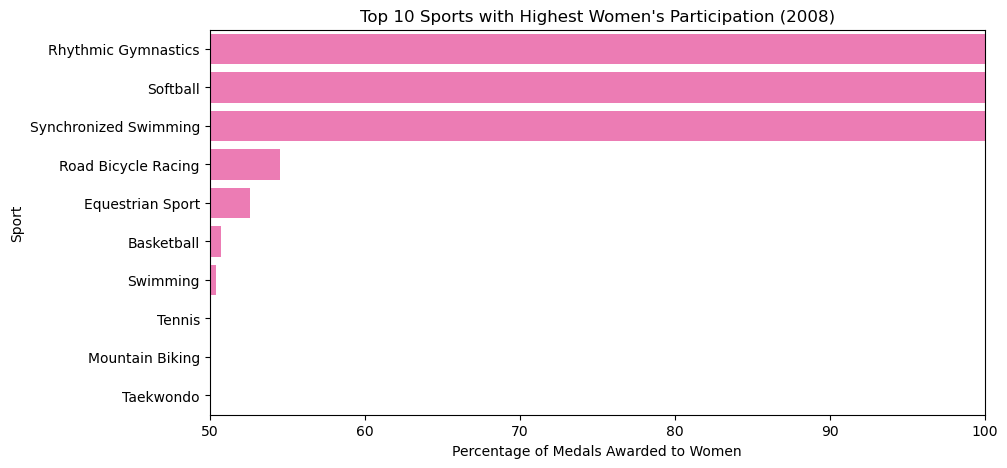

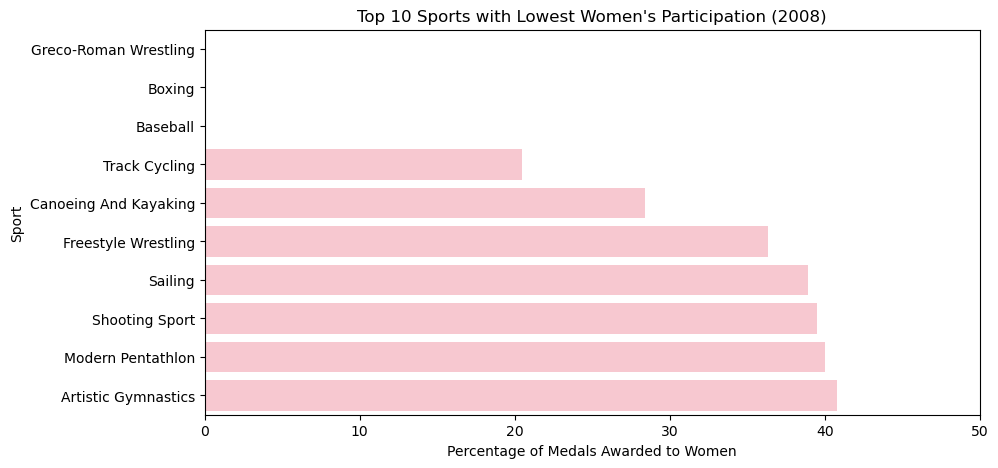

In [ ]:
# Get top 10 sports where women had the LOWEST representation
bottom_10_female_rep = least_female_rep_sports.head(10)

# Get top 10 sports where women had the HIGHEST representation
top_10_female_rep = most_female_rep_sports.head(10)

# Plot the top 10 (most female participation)
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_female_rep['Female Medal Share (%)'], y=top_10_female_rep.index, color = 'hotpink')

plt.title("Top 10 Sports with Highest Women's Participation (2008)")
plt.xlabel("Percentage of Medals Awarded to Women")
plt.ylabel("Sport")
plt.xlim(50, 100)  # Limit x-axis to 50-100% because we're looking at overrepresentation 
plt.show()

# Plot the bottom 10  (least female participation)
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_10_female_rep['Female Medal Share (%)'], y=bottom_10_female_rep.index, color = 'pink')

plt.title("Top 10 Sports with Lowest Women's Participation (2008)")
plt.xlabel("Percentage of Medals Awarded to Women")
plt.ylabel("Sport")
plt.xlim(0, 50)  # Limit x-axis from 0-50% because we're looking at underrepresentation
plt.show()
